# Analysis 과정 - Deep Learning

## 강의 개요


* <font size='4'>왜 딥러닝인가?</font>  
  - 통계, 머신러닝, 딥러닝의 차이
  - 딥러닝으로 풀 수 있는 문제


* <font size='4'>딥러닝의 원리</font>
  - 학습이란?
  - 어떻게 데이터를 학습하는가


* <font size='4'>딥러닝의 구조</font>
  - <b>입력 $\rightarrow$ 모델 $\rightarrow$ 출력</b>
  - <b>Layer</b> : 모델의 구성단위
  - <b>Activation</b> : 비선형 모델로 가는 길
  - <b>Bias</b> : 영점조절



* <font size='4'>학습으로 돌아와서</font>
  - <b>Train Set</b> : 기출 문제은행
  - <b>Batch</b> : 모의고사
  - <b>Epoch</b> : 1회독
  - <b>Step</b> : 모의고사 응시횟수
  - <b>Loss</b> : 시험점수
  - <b>Gradient</b> : 공부방향
  - <b>Optimization</b> : 공부방법
  - <b>Backpropagation</b> : 오답노트, 복습


* <font size='4'>모델 평가</font>
  - <b>Accuracy</b> : 문제은행
  - <b>Batch</b> : 모의고사
  - <b>Epoch</b> : 1회독
  - <b>Step</b> : 모의고사 응시횟수


* <font size='4'>딥러닝의 발전</font>
  - <font size='3'><b>MLP</b></font> : 다 엮어보자! 죄다 연결된 신경망 (Fully Connected), 빡빡한 신경망 (Dense)
  - <font size='3'><b>CNN</b></font> : Image를 부분으로 쪼개서 조금씩 보자!
  - <font size='3'><b>RNN</b></font> : Data 순서에 의미가 있다면? 과거를 기억하자  
    - <font size='2'><b>Advanced RNN</b></font> : 기억력 향상  


### 강의 진행 과정

* 기본
  1. 실습 진행 ( Code Review & 작성 )
    - `keras`
  2. 개념 설명
  3. 개념 이해 ( Code Review )
    - `numpy`


* 심화
  1. 개념 반복
  1. 실습 진행
    - `tensorflow`


## Input

In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
from unipy import aprint, lprint

import matplotlib.pyplot as plt

import importlib
from src import examples
from src.utils import lprint, qprint, keras_lossplot, keras_predict_plot
from src.layers import sigmoid

importlib.reload(examples)


from src.load_data import column_range_scaler, load_data

/opt/conda/envs/tf-py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/envs/tf-py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/envs/tf-py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Loading

In [2]:
rawdata = pd.read_csv(
    'data/data_10min.csv',
    parse_dates=['EVT_DTM'],
    dtype={
        'VEND_ID': 'str',
        'ENB_ID': 'str',
        'CELL_ID': 'str',
        'FREQ_TYP_CD': 'str',
    }
)

kpi_list = ['CQI', 'UE_TX_POWER', 'DL_PRB_USAGE_RATE']

rawdata.head(20)

,EVT_DTM,VEND_ID,ENB_ID,CELL_ID,FREQ_TYP_CD,CQI,DL_PRB_USAGE_RATE,UE_TX_POWER
0,2018-07-02 08:00:00,SS,28380,24,10,13.990000,2.738333,9.182692
1,2018-07-02 08:10:00,SS,28380,24,10,13.998333,2.481667,5.597436
2,2018-07-02 08:20:00,SS,28380,24,10,14.100000,3.475000,7.600000
3,2018-07-02 08:30:00,SS,28380,24,10,13.881667,3.291667,10.550000
4,2018-07-02 08:40:00,SS,28380,24,10,13.323333,4.091667,11.894444
5,2018-07-02 08:50:00,SS,28380,24,10,13.863333,3.393333,7.707843
6,2018-07-02 09:00:00,SS,28380,24,10,13.115000,4.806667,7.663462
7,2018-07-02 09:10:00,SS,28380,24,10,13.095000,5.243333,8.254386
8,2018-07-02 09:20:00,SS,28380,24,10,12.905000,6.326667,7.367241
9,2018-07-02 09:30:00,SS,28380,24,10,12.893333,7.610000,8.555357


AxesSubplot(0.125,0.125;0.775x0.755)


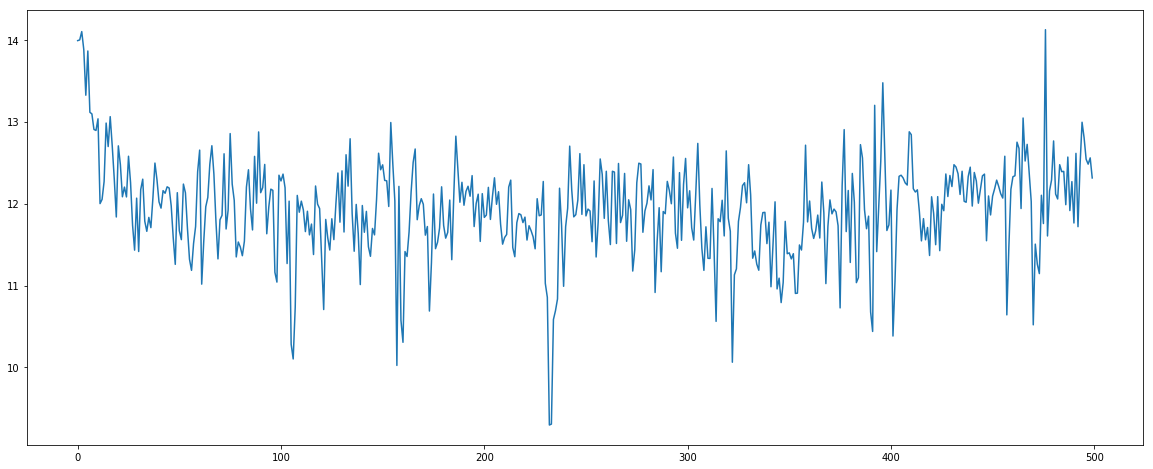

In [3]:
print(rawdata['CQI'][:500].plot(figsize=(20, 8)))

AxesSubplot(0.125,0.125;0.775x0.755)


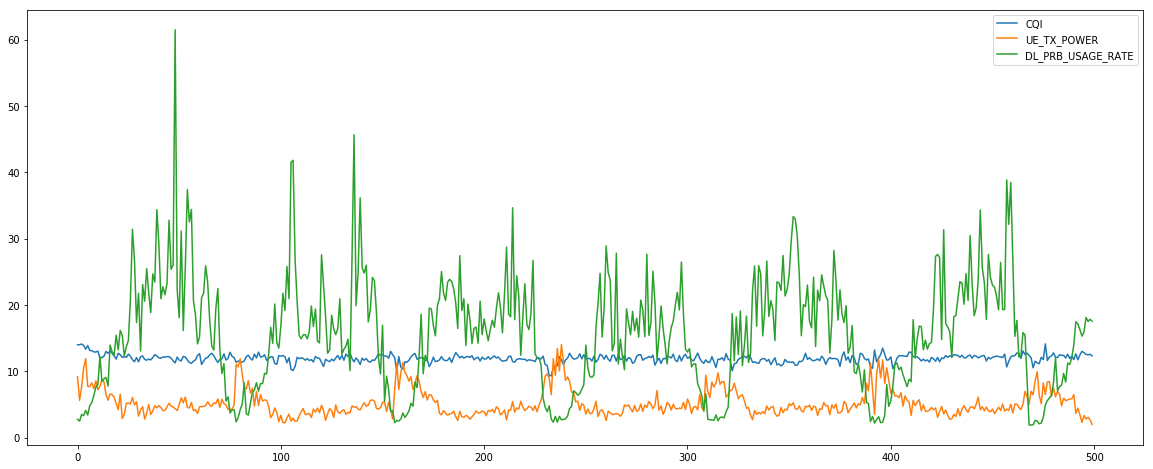

In [4]:
print(rawdata[kpi_list][:500].plot(figsize=(20, 8)))

### Scaling

In [5]:
kpi_range_dict = {
    'CQI': [0, 15],
    'UE_TX_POWER': [-17, 23],
    'DL_PRB_USAGE_RATE': [0, 100],
}

data_scaled, scaler_dict = column_range_scaler(
    rawdata[kpi_list],
    vendor_name='SS',
    col_real_range_dict=kpi_range_dict,
    feature_range=(0., 1.),
)

AxesSubplot(0.125,0.125;0.775x0.755)


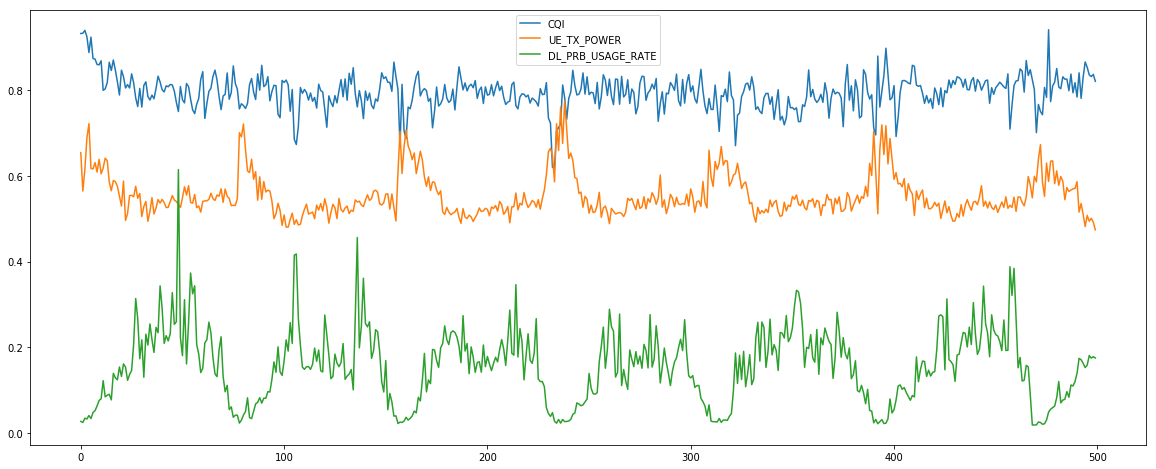

In [6]:
print(data_scaled[:500].plot(figsize=(20, 8)))

In [7]:
data_scaled.head()

,CQI,UE_TX_POWER,DL_PRB_USAGE_RATE
0,0.932667,0.654567,0.027383
1,0.933222,0.564936,0.024817
2,0.940000,0.615000,0.034750
3,0.925444,0.688750,0.032917
4,0.888222,0.722361,0.040917


### Sliding Window (`RNN`)

이번에는 `Time`축과 `KPI` 축을 모두 고려해 보자.

<br>
<font size='4'> <b> $\cdot$ Case 3:</b> 여러 시점의 KPI로 다음 KPI 예측하기 (3 KPI)</font>
<br>
<br>

<img src="images/rnn/rnn_graphset01.png" >
<br>

<br>
<font size='4'> <b> $\cdot$ 데이터 구조</b></font>
<br>

<img src="images/sliding_windows_rnn.png" >
<img src="images/sliding_windows_rnn_reshaping.png" >

[Link to RNN Model](#(실습)-RNN-in-keras:-many-to-many)

#### Exercise 1 : Basic

In [8]:
case_list = []
for i in range(4):
    case_list += [data_scaled[i:i+7]]

case_list

[        CQI  UE_TX_POWER  DL_PRB_USAGE_RATE
 0  0.932667     0.654567           0.027383
 1  0.933222     0.564936           0.024817
 2  0.940000     0.615000           0.034750
 3  0.925444     0.688750           0.032917
 4  0.888222     0.722361           0.040917
 5  0.924222     0.617696           0.033933
 6  0.874333     0.616587           0.048067,
         CQI  UE_TX_POWER  DL_PRB_USAGE_RATE
 1  0.933222     0.564936           0.024817
 2  0.940000     0.615000           0.034750
 3  0.925444     0.688750           0.032917
 4  0.888222     0.722361           0.040917
 5  0.924222     0.617696           0.033933
 6  0.874333     0.616587           0.048067
 7  0.873000     0.631360           0.052433,
         CQI  UE_TX_POWER  DL_PRB_USAGE_RATE
 2  0.940000     0.615000           0.034750
 3  0.925444     0.688750           0.032917
 4  0.888222     0.722361           0.040917
 5  0.924222     0.617696           0.033933
 6  0.874333     0.616587           0.048067
 7  0.87

#### Exercise 2 : Sliding Window

In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual, interactive_output
import ipywidgets as widgets
from IPython.display import display
from pprint import pprint

In [10]:
@interact(
    case_num=widgets.IntSlider(min=1, max=10, step=1, value=2),
    window_size=widgets.IntSlider(min=2, max=10, step=1, value=7),
    kpi_num=widgets.IntSlider(min=1, max=3, step=1, value=3),
)
def shape_print(case_num, window_size, kpi_num):

    data_cnt = case_num
    input_size = window_size
    input_dim = kpi_num

    print(
        '=' * 51 +
        '\n (data_cnt, input_size, input_dim)  ' +
        ':' +
        f'  ({data_cnt}, {input_size}, {input_dim})\n' +
        '=' * 51 + 
        '\n',
    )

    
    #==== Essential ========================================================#

    case_list = []
    for i in range(data_cnt):
        case_list += [(
            'X ' +  '=' * 40,
            data_scaled.iloc[i:i+input_size, :input_dim],
        )]

    #=======================================================================#


    pprint(case_list)

interactive(children=(IntSlider(value=2, description='case_num', max=10, min=1), IntSlider(value=7, descriptio…

#### Exercise 3 : Sliding Window `(X & Y)`

In [11]:
@interact(
    case_num=widgets.IntSlider(min=1, max=10, step=1, value=2),
    window_x=widgets.IntSlider(min=2, max=5, step=1, value=5),
    window_y=widgets.IntSlider(min=1, max=5, step=1, value=2),
    input_kpi_num=widgets.IntSlider(min=1, max=3, step=1, value=3),
    output_kpi_num=widgets.IntSlider(min=1, max=3, step=1, value=3),
)
def shape_print(case_num, window_x, window_y, input_kpi_num, output_kpi_num):

    data_cnt = case_num
    input_size = window_x
    output_size = window_y
    window_size = input_size + output_size
    input_dim = input_kpi_num
    output_dim = output_kpi_num

    print(
        '=' * 60 +
        '\n [X]: (data_cnt, input_size,  input_dim )  ' +
        ':' +
        f'  ({data_cnt}, {input_size}, {input_dim})' +
        '\n [Y]: (data_cnt, output_size, output_dim)  ' +
        ':' +
        f'  ({data_cnt}, {output_size}, {output_dim})\n' +
        '=' * 60 + 
        '\n',
    )
    
    #==== Essential ========================================================#

    case_list = []
    for i in range(data_cnt):
        case_list += [(
            'X ' +  '=' * 40,
            data_scaled.iloc[i:i+input_size, :input_dim],
            'Y ' +  '-' * 40,
            data_scaled.iloc[i+input_size:i+input_size+output_size, :output_dim],
        )]
 
    #=======================================================================#
    

    pprint(case_list)

interactive(children=(IntSlider(value=2, description='case_num', max=10, min=1), IntSlider(value=5, descriptio…

In [12]:
def sliding_window_rnn(data, data_cnt, input_size, output_size, input_dim, output_dim):

    case_x_list = []
    case_y_list = []
    
    data_rownum = data.shape[0]
    max_data_cnt = data_rownum - (input_size + output_size) + 1
    
    if data_cnt is None:
        data_cnt = max_data_cnt
    else:
        data_cnt = min(data_cnt, max_data_cnt)
    
    
    #==== Essential ========================================================#
    
    for i in range(data_cnt):
        case_x_list += [data_scaled.iloc[i:i+input_size, :input_dim].values]
        case_y_list += [data_scaled.iloc[i+input_size:i+input_size+output_size, :output_dim].values]

    #=======================================================================#


    print(
        '=' * 60 +
        '\n [X]: (data_cnt, input_size,  input_dim )  ' +
        ':' +
        f'  ({data_cnt}, {input_size}, {input_dim})' +
        '\n [Y]: (data_cnt, output_size, output_dim)  ' +
        ':' +
        f'  ({data_cnt}, {output_size}, {output_dim})\n' +
        '=' * 60 + 
        '\n',
    )
        
    return np.stack(case_x_list), np.stack(case_y_list)


#==== Essential ========================================================#

data_x_rnn, data_y_rnn = sliding_window_rnn(
    data_scaled,
    data_cnt=data_scaled.shape[0],
    input_size=5,
    output_size=2,
    input_dim=3,
    output_dim=2,
)

#=======================================================================#


aprint(data_x_rnn[:5], data_y_rnn[:5], name_list=['data_x_rnn[:5]', 'data_y_rnn[:5]'])

 [X]: (data_cnt, input_size,  input_dim )  :  (4284, 5, 3)
 [Y]: (data_cnt, output_size, output_dim)  :  (4284, 2, 2)

|  data_x_rnn[:5]                          |   data_y_rnn[:5]               |
|  (5, 5, 3)                               |   (5, 2, 2)                    |
|  [[[0.93266667 0.65456731 0.02738333]    |   [[[0.92422222 0.61769608]    |
|    [0.93322222 0.5649359  0.02481667]    |     [0.87433333 0.61658654]]   |
|    [0.94       0.615      0.03475   ]    |                                |
|    [0.92544444 0.68875    0.03291667]    |    [[0.87433333 0.61658654]    |
|    [0.88822222 0.72236111 0.04091667]]   |     [0.873      0.63135965]]   |
|                                          |                                |
|   [[0.93322222 0.5649359  0.02481667]    |    [[0.873      0.63135965]    |
|    [0.94       0.615      0.03475   ]    |     [0.86033333 0.60918103]]   |
|    [0.92544444 0.68875    0.03291667]    |                                |
|    [0.88822222 0.7223

### Splitting data : Train & Test

In [13]:
# train_x_mlp, test_x_mlp = data_x_mlp[:4000], data_x_mlp[4000:]
# train_y_mlp, test_y_mlp = data_y_mlp[:4000], data_y_mlp[4000:]


train_x_rnn, test_x_rnn = data_x_rnn[:4000], data_x_rnn[4000:]
train_y_rnn, test_y_rnn = data_y_rnn[:4000], data_y_rnn[4000:]

In [14]:
data_dict = load_data()

train_x_rnn = data_dict['train_x_rnn']
train_y_rnn = data_dict['train_y_rnn']
test_x_rnn = data_dict['test_x_rnn']
test_y_rnn = data_dict['test_y_rnn']

Loading Data...
train_x_mlp : (4000, 3)
train_y_mlp : (4000, 2)
train_x_rnn : (4000, 5, 3)
train_y_rnn : (4000, 2, 2)
test_x_mlp : (289, 3)
test_y_mlp : (289, 2)
test_x_rnn : (284, 5, 3)
test_y_rnn : (284, 2, 2)
Complete.


## (실습) RNN in `keras`

이번에는 `Time`축과 `KPI` 축을 모두 고려해 보자.

<br>
<font size='4'> <b> $\cdot$ Case 3:</b> 여러 시점의 KPI로 다음 KPI 예측하기 (3 KPI)</font>
<br>
<br>

<img src="images/rnn/rnn_graphset01.png" >
<br>

<br>
<font size='4'> <b> $\cdot$ 데이터 구조</b></font>
<br>

<img src="images/sliding_windows_rnn.png" >
<img src="images/sliding_windows_rnn_reshaping.png" >

[Link to RNN Input](#Sliding-Window-(RNN))

<br>
<br>
<font size='4'> <b> $\cdot$ 계산 흐름 : RNN</b></font>
<img src="images/rnn/rnn_compute_flow.gif" >
<br>

<font size='4'> <b> $\cdot$ 코드 리뷰 : RNN</b></font>
<img src="images/rnn/rnn_keras_without_projection.png" >

[Link to RNN Input](#Sliding-Window-(RNN))

<div class="alert alert-block alert-info">
<b>$\divideontimes$ State 란 : </b> 

RNN Framework에서 사용하는 `state`는 상태라는 뜻이며, 입력값의 순서를 기억하는 메모리를 의미한다.

<br>

3개의 값이 입력된다고 했을 때,  
MLP 모델은 <b>1회 입력(3개) $\rightarrow$ 1회 출력</b> 방식이라면  
RNN 모델은 <b>3회 입력(1개씩) $\rightarrow$ 3회 출력</b> 구조로 이루어져 있다.

코드로 차이를 확인해 보자.
* MLP

```py
Y = []
Y = f(X)

return Y
```

* RNN

```py
memory = 0
Y = []

for x in X:
    y, memory = f(x, memory)
    Y.append(y)

return Y
```

`X`값과 같이 입력되고, `Y`값과 함께 출력되며 갱신된다.

<b>이렇게 메모리로 현재 상태에 대한 정보(기억)를 업데이트하는 특징</b>이
RNN이 'Recursive'가 아닌 'Recurrent'인 이유이다.

<br>
<br>
<br>
<font size='5'><center><b><i>"`state`로 과거를 기억해서 새로운 Input과 조합한다."</i></b></center></font>
<br>
<br>
</div>
<br>

In [15]:
import keras.backend as K
from keras import Model, Sequential
from keras.layers import (Input, Dense, Activation, Lambda,
                          SimpleRNNCell, SimpleRNN, RNN, TimeDistributed)

from keras.losses import mean_squared_error

Using TensorFlow backend.


### RNN Model

In [16]:
train_x_rnn.shape

(4000, 5, 3)

In [17]:
input_layer = Input(shape=(5, 3))
rnn_cell = SimpleRNNCell(2, activation=None)
rnn_layer = RNN(rnn_cell, return_sequences=True, return_state=True)
subset_layer = Lambda(lambda x: x[:, -2:, :])

rnn_outputs, rnn_hidden_state = rnn_layer(input_layer)
output = subset_layer(rnn_outputs)

model = Model(inputs=[input_layer], outputs=[output])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5, 3)              0         
_________________________________________________________________
rnn_1 (RNN)                  [(None, 5, 2), (None, 2)] 12        
_________________________________________________________________
lambda_1 (Lambda)            (None, 2, 2)              0         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


### RNN Building

In [18]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

### RNN Training

In [20]:
fitted = model.fit(
    train_x_rnn,
    train_y_rnn[:, :, :2],
    batch_size=32,
    epochs=10,
    validation_split=.2,
    verbose=1,            # [verbose] 1: progress bar, 2: one line per epoch
    shuffle=True,
)

Train on 3200 samples, validate on 800 samples
Epoch 1/10
3200/3200 [==============================] - 0s 99us/step - loss: 0.0207 - mean_absolute_error: 0.1244 - val_loss: 0.0137 - val_mean_absolute_error: 0.0999
Epoch 2/10
3200/3200 [==============================] - 0s 91us/step - loss: 0.0095 - mean_absolute_error: 0.0779 - val_loss: 0.0087 - val_mean_absolute_error: 0.0712
Epoch 3/10
3200/3200 [==============================] - 0s 89us/step - loss: 0.0070 - mean_absolute_error: 0.0605 - val_loss: 0.0080 - val_mean_absolute_error: 0.0634
Epoch 4/10
3200/3200 [==============================] - 0s 88us/step - loss: 0.0066 - mean_absolute_error: 0.0571 - val_loss: 0.0078 - val_mean_absolute_error: 0.0620
Epoch 5/10
3200/3200 [==============================] - 0s 90us/step - loss: 0.0065 - mean_absolute_error: 0.0565 - val_loss: 0.0075 - val_mean_absolute_error: 0.0607
Epoch 6/10
3200/3200 [==============================] - 0s 88us/step - loss: 0.0064 - mean_absolute_error: 0.0560 - va

limit_output extension: Maximum message size of 10000 exceeded with 10080 characters

### RNN Evaluation

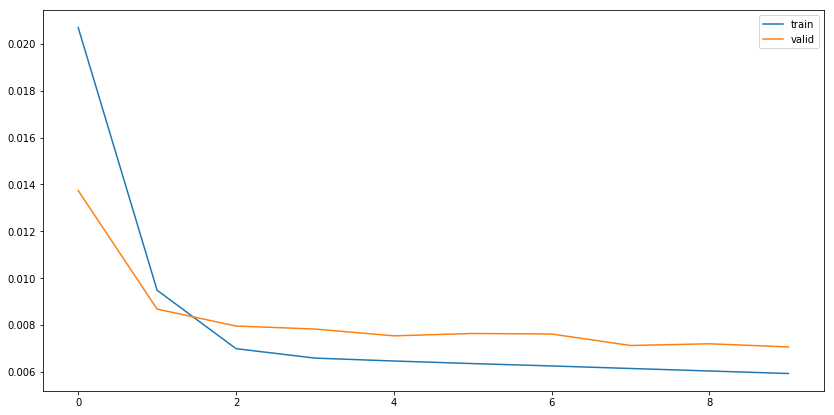

In [21]:
keras_lossplot(model)

In [22]:
model.evaluate(test_x_rnn, test_y_rnn)

284/284 [==============================] - 0s 349us/step


[0.0069215348462613535, 0.06022142639882128]

### RNN Prediction (Inference)

In [23]:
test_x_rnn[:1]

array([[[0.8298889 , 0.65433335, 0.2101    ],
        [0.8277778 , 0.6791667 , 0.19303334],
        [0.8387778 , 0.6594167 , 0.14441666],
        [0.8143333 , 0.683625  , 0.18081667],
        [0.7651111 , 0.6902083 , 0.29873332]]], dtype=float32)

In [24]:
model.predict(test_x_rnn[:1])

array([[[0.8063845 , 0.6791359 ],
        [0.79298097, 0.81541634]]], dtype=float32)

In [25]:
test_y_rnn[:1]

array([[[0.83588886, 0.6701667 ],
        [0.869     , 0.6617917 ]]], dtype=float32)

/opt/conda/envs/tf-py36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


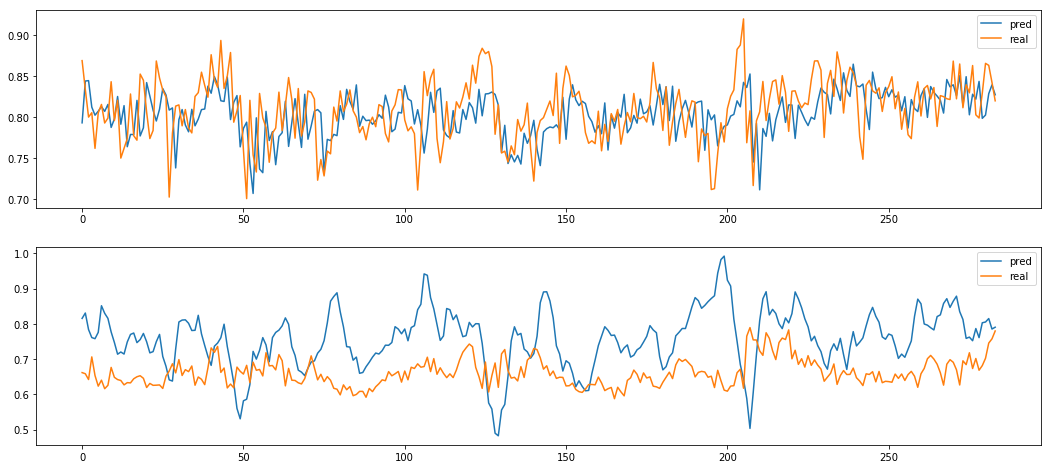

In [26]:
keras_predict_plot(model, test_x_rnn, test_y_rnn, method='rnn')

## (개념) RNN: Recurrent Neural Networks

우선, 데이터를 보면서 이야기해 보자.

<br>

<img src="images/rnn/rnn_graphset01.png" >
<br>


`MLP`, `CNN` 등 다른 딥러닝 구조는 한 시점의 데이터 Snapshot을 Input으로 활용한다.  
즉, 시간 $t$ 에 따른 상태 변화를 반영하지는 못한다.  
Time에 해당하는 Row를 길게 가져가더라도, 값을 한번에 확인해 버린다.  
값의 순서를 따져서 기억하고 다음 순서에 반영하는 부분이 없다.
<br>
<font size='3'><font color='#00000'><b><i>이 때의 패턴은 생김새, 형태에 가깝다.</i></b></font></font>


이에 반해 `RNN`에서는 Input을 하나씩 차례대로 받아들인다.  
값의 순서와 변화를 기억해서, 나중 값을 받아 들일 때 기억을 반영해 판단한다.
<br>
그래서 <font size='3'><font color='#318CE7'><b><i>RNN에서의 패턴은 순서를 의미하게 된다.</i></b></font></font>

<div class="alert alert-block alert-warning">
<b>$\divideontimes$ RNN의 특징: </b> 데이터를 차례대로 확인하며 순서를 기억한다.
<br>
<br>
<font size='5'>$$[2 \times 3]=[Data \space 개수, Data \space 차원]$$  </font>

</div>  

<br>
<font size='5'><center><b><i>"데이터 순서를 기억해 보자"</i></b></center></font>

<img src='images/rnn/rnn_compute_flow.gif' width='100%'>


<div class="alert alert-block alert-warning">
<b>$\cdot$ RNN Input Flow : </b> 


입력받은 Data를 한 번에 처리하지 않고, $t$의 변화에 따라 Sequential하게 받아들임.  
이전 시점 $t-1$의 State($h_{t-1}$)를 입력받아  
현재 시점 $t$에 Input($x_{t}$)과 State($h_{t-1}$)을 이용하여 Output($\hat y_{t}$)을 출력하고,  
다음 시점 $t+1$에 State($h_{t}$)를 전달하게 됨.

<br>
<font size='4'>$$ \hat y_{t}, h_{t} = f(x_{t}, h_{t-1})$$</font>

<br>
$$h_{\langle t \rangle} = \tanh(W^{a} h_{\langle t-1 \rangle} + W^{b} x_{\langle t \rangle} + b^a)\tag{RNN Cell}$$
<br>
<img src="images/rnn/rnn_input_flow.gif" >
<br>

</div>




<img src='images/rnn/rnn_unsymbolized_flow.png' width='75%'>

<img src='images/rnn/rnn_symbolized_flow.png' width='75%'>

<div class="alert alert-block alert-success">
<b>$\cdot$ RNN에서 <i>'tanh'</i>의 역할 :</b>

- without `tanh` : 이전 $t-1$ 상태가 normalize되지 못하고 그대로 반영되어 $t$ 시점의 `input`값의 크기와 관계없는 결과값 출력.
  <img src="images/rnn/rnn_without_tanh_output.gif">  
- with `tanh`: 출력값의 범위를 제한(regularize)하여 $t$ 시점의 `state`와 `input`을 골고루 반영. 
  <img src="images/rnn/rnn_with_tanh_output.gif">  

<br>

</div>


<font size='4'>아래와 같은 RNN 모델을 짜 보자.</font>
<br>
<br>

<img src='images/rnn/rnn_unsymbolized_flow_batch.png'>

### Input

In [27]:
arr_x = train_x_rnn[:2].round(2)
arr_x1 = train_x_rnn[0].round(2)

aprint(arr_x, arr_x1, name_list=['arr_x', 'arr_x1'])

|  arr_x                 |   arr_x1              |
|  (2, 5, 3)             |   (5, 3)              |
|  [[[0.93 0.65 0.03]    |   [[0.93 0.65 0.03]   |
|    [0.93 0.56 0.02]    |    [0.93 0.56 0.02]   |
|    [0.94 0.62 0.03]    |    [0.94 0.62 0.03]   |
|    [0.93 0.69 0.03]    |    [0.93 0.69 0.03]   |
|    [0.89 0.72 0.04]]   |    [0.89 0.72 0.04]]  |
|                        |                       |
|   [[0.93 0.56 0.02]    |                       |
|    [0.94 0.62 0.03]    |                       |
|    [0.93 0.69 0.03]    |                       |
|    [0.89 0.72 0.04]    |                       |
|    [0.92 0.62 0.03]]]  |                       |


### Output

In [28]:
arr_y = train_y_rnn[:2].round(2)
arr_y1 = train_y_rnn[0].round(2)

aprint(arr_y, arr_y1, name_list=['arr_y', 'arr_y1'])

|  arr_y            |   arr_y1         |
|  (2, 2, 2)        |   (2, 2)         |
|  [[[0.92 0.62]    |   [[0.92 0.62]   |
|    [0.87 0.62]]   |    [0.87 0.62]]  |
|                   |                  |
|   [[0.87 0.62]    |                  |
|    [0.87 0.63]]]  |                  |


### Layers

<br>
<br>
<font size='4'> <b> $\cdot$ 계산 흐름 : RNN</b></font>
<img src="images/rnn/rnn_compute_flow.gif" >
<br>

<font size='4'> <b> $\cdot$ 코드 리뷰 : RNN</b></font>
<img src="images/rnn/rnn_keras_without_projection.png" >

[Link to RNN Input](#Sliding-Window-(RNN))

#### RNN Cell

In [29]:
from src.layers import dense_layer, sigmoid, tanh


def rnn_cell(
    input_x,
    unit_num=2,
    initial_state=None,
    activation=tanh,
    seed=1,
    ):
    
    input_dim = input_x.shape[-1]
    output_dim = unit_num

    np.random.seed(seed)


    input_w = np.random.random((input_dim, output_dim)).round(2)
    state_w = np.random.random((output_dim, output_dim)).round(2)
    
    input_b = np.random.random((output_dim, )).round(2)
    
    if initial_state is None:
        initial_state = np.random.random((output_dim,)).round(2)

    
    #==== Essential ========================================================#

    ht_0 = initial_state
    xt = input_x
    
    ht = (xt @ input_w) + input_b
    
    output = ht + (ht_0 @ state_w)

    if activation:
        output = activation(output)

    #=======================================================================#

    
    return output, output

In [30]:
output, ht = rnn_cell(arr_x1[0])

aprint(arr_x1, arr_x1[0], name_list=['arr_x1', '1st time'])
aprint(output, ht, name_list=['1st output', 'hidden_state'])

|  arr_x1              |   1st time          |
|  (5, 3)              |   (3,)              |
|  [[0.93 0.65 0.03]   |   [0.93 0.65 0.03]  |
|   [0.93 0.56 0.02]   |                     |
|   [0.94 0.62 0.03]   |                     |
|   [0.93 0.69 0.03]   |                     |
|   [0.89 0.72 0.04]]  |                     |
|  1st output               |   hidden_state             |
|  (2,)                     |   (2,)                     |
|  [0.83520361 0.97059714]  |   [0.83520361 0.97059714]  |


#### RNN Flow

In [31]:
def rnn_flow(
    rnn_cell,
    input_x,
    unit_num=1,
    initial_state=None,
    activation=tanh,
    seed=1,
    ):
    
    output_dim = unit_num
    np.random.seed(seed)
    hidden_state = np.random.random((output_dim,)).round(2)
    
    print(f'\n=== {0} Timestep ===')
    aprint(input_x, hidden_state,
        name_list=['xt', 'initial_hidden_state'],
        maxlen=20,
    )

    
    output_list = []

    #==== Essential ========================================================#

    for i, xt in enumerate(input_x):
        output_t, hidden_state = rnn_cell(
            xt,
            unit_num=unit_num,
            initial_state=hidden_state,
            activation=tanh,
            seed=seed,
        )
        output_list += [output_t]
        outputs = np.stack(output_list)

        #===================================================================#
        
        print(f'\n=== {i+1} Timestep ===')
        aprint(xt, output_t, hidden_state,
            name_list=['xt', 'output_t', 'hidden_state'],
            #maxlen=15,
            decimals=3,
        )

    print(f'\n=== Final Output ===')
    aprint(input_x, outputs, output_t, hidden_state,
        name_list=['full_inputs', 'full_outputs', 'output_t', 'hidden_state'],
        #maxlen=15,
        decimals=3,
    )
    
    return outputs, hidden_state

In [32]:
(full_output,  last_hidden_state) = rnn_flow(
    rnn_cell,
    arr_x1,
    unit_num=2,
)


=== 0 Timestep ===
|  xt                    |   initial_hidden_state  |
|  (5, 3)                |   (2,)                  |
|  [[0.93 0.65 0.03]     |   [0.42 0.72]           |
|   [0.93 0.56 0.02]     |                         |
|   [0.94 0.62 0.03]     |                         |
|   [0.93 0.69 0.03]     |                         |
|   [0.89 0.72 0.04]]    |                         |

=== 1 Timestep ===
|  xt                |   output_t       |   hidden_state   |
|  (3,)              |   (2,)           |   (2,)           |
|  [0.93 0.65 0.03]  |   [0.828 0.97 ]  |   [0.828 0.97 ]  |

=== 2 Timestep ===
|  xt                |   output_t       |   hidden_state   |
|  (3,)              |   (2,)           |   (2,)           |
|  [0.93 0.56 0.02]  |   [0.876 0.982]  |   [0.876 0.982]  |

=== 3 Timestep ===
|  xt                |   output_t       |   hidden_state   |
|  (3,)              |   (2,)           |   (2,)           |
|  [0.94 0.62 0.03]  |   [0.881 0.983]  |   [0.881 0.983]  |


### RNN Batch

In [33]:
def rnn_flow_batch(
    rnn_cell,
    input_x,
    unit_num=1,
    initial_state=None,
    activation=np.tanh,
    seed=1,
    time_major=False,
    ):
    
    output_dim = unit_num
    
    np.random.seed(seed)
    hidden_state = np.random.random((output_dim,)).round(2)
    output_list = []

    if time_major:
        input_x_time_major = input_x
        aprint(input_x, hidden_state,
            name_list=['input_x', 'initial_hidden_state'],
            decimals=3,
        )

    else:
        input_x_time_major = np.swapaxes(input_x, 0, 1)
        aprint(input_x, input_x_time_major, hidden_state,
            name_list=['input_x', 'time_major_x', 'initial_hidden_state'],
            decimals=3,
        )


    #==== Essential ========================================================#

    for i, xt in enumerate(input_x_time_major):
        output_t, hidden_state = rnn_cell(
            xt,
            unit_num=unit_num,
            initial_state=hidden_state,
            activation=activation,
            seed=seed,
        )
        output_list += [output_t]
        outputs_time_major = np.stack(output_list)


    #=======================================================================#

        print(f'\n=== {i+1} Timestep ===')
        aprint(xt, output_t, hidden_state,
            name_list=['xt', 'output_t', 'hidden_state'],
            decimals=3,
        )


    if time_major:
        outputs = outputs_time_major
    else:
        outputs = np.swapaxes(outputs_time_major, 1, 0)
    
    
    print(f'\n=== Final Output (TIME_MAJOR={time_major})===')
    aprint(input_x, outputs, output_t, hidden_state,
        name_list=['full_inputs', 'full_outputs', 'output_t', 'hidden_state'],
        decimals=3,
    )
    
    return outputs, hidden_state

In [34]:
full_output, last_hidden_state = rnn_flow_batch(
    rnn_cell,
    arr_x,
    unit_num=2,
    time_major=False,
)

|  input_x               |   time_major_x          |   initial_hidden_state  |
|  (2, 5, 3)             |   (5, 2, 3)             |   (2,)         |
|  [[[0.93 0.65 0.03]    |   [[[0.93 0.65 0.03]    |   [0.42 0.72]  |
|    [0.93 0.56 0.02]    |     [0.93 0.56 0.02]]   |                |
|    [0.94 0.62 0.03]    |                         |                |
|    [0.93 0.69 0.03]    |    [[0.93 0.56 0.02]    |                |
|    [0.89 0.72 0.04]]   |     [0.94 0.62 0.03]]   |                |
|                        |                         |                |
|   [[0.93 0.56 0.02]    |    [[0.94 0.62 0.03]    |                |
|    [0.94 0.62 0.03]    |     [0.93 0.69 0.03]]   |                |
|    [0.93 0.69 0.03]    |                         |                |
|    [0.89 0.72 0.04]    |    [[0.93 0.69 0.03]    |                |
|    [0.92 0.62 0.03]]]  |     [0.89 0.72 0.04]]   |                |
|                        |                         |                |
|          

## Advanced RNN

- <font size='5'><b> Vanishing Gradient Problem</b> </font>

RNN의 입력 데이터는 Sequential한 형태로 구성된다. (<font color='green'>$sequence \space length$</font>, <font color='brown'>$input \space dimension$</font>)
의 차원을 가지며,  
각각 (<font color='green'>$데이터 \space 길이$</font>, <font color='brown'>$데이터 \space 크기$</font>)로서 의미를 갖는다.

 * <font color='green'>seq_length: $t$</font>
 * <font color='brown'>input_dim : $d$</font>

라고 할 때,

*__$t$ 가 커질 수록 (입력 데이터의 길이가 길어질 수록)__*, RNN은 __<font color='red'><i>예전 정보를 망각하고</i></font>__ 최근 정보의 영향을 많이 받게 된다.  
<br>
<img src="images/rnn/rnn_vanishing_grad_thru_time.gif" width='45%' align='left'>  <img src="images/rnn/rnn_vanishing_grad_thru_time.png" width='45%' align='right'>  

### Bi-directional RNN

<br>

먼 과거의 정보를 잊어버리는 현상을 막기 위해,  
`순방향`과 `역방향`으로 데이터를 탐색하여 <font size='3' color='#318CE7'><b><i>과거의 정보를 보존하는 효과를 얻는다.</i></b></font>  

<img src="images/rnn/rnn_bidirectional_flow.gif" width='45%' align='left'>  <img src="images/rnn/rnn_bidirectional_flow.png" width='45%' align='right'>  

## (실습) Bidirectional in `keras`

In [35]:
from keras.layers.wrappers import Bidirectional

### Bi-RNN Model

In [36]:
train_x_rnn.shape

(4000, 5, 3)

In [37]:
input_layer = Input(shape=(5, 3))
rnn_cell = SimpleRNNCell(2, activation=None)
rnn_layer = RNN(rnn_cell, return_sequences=True, return_state=True)
bi_rnn_layer = Bidirectional(rnn_layer, merge_mode='sum')
subset_layer = Lambda(lambda x: x[:, -2:, :])

rnn_outputs, rnn_hidden_state_forward, rnn_hidden_state_backward = bi_rnn_layer(input_layer)
output = subset_layer(rnn_outputs)

model = Model(inputs=[input_layer], outputs=[output])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 5, 3)              0         
_________________________________________________________________
bidirectional_1 (Bidirection [(None, 5, 2), (None, 2), 24        
_________________________________________________________________
lambda_2 (Lambda)            (None, 2, 2)              0         
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


### Bi-RNN Building

In [38]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

### Bi-RNN Training

In [39]:
fitted = model.fit(
    train_x_rnn,
    train_y_rnn[:, :, :2],
    batch_size=32,
    epochs=10,
    validation_split=.2,
    verbose=1,            # [verbose] 1: progress bar, 2: one line per epoch
    shuffle=True,
)

Train on 3200 samples, validate on 800 samples
Epoch 1/10
3200/3200 [==============================] - 1s 274us/step - loss: 0.1835 - mean_absolute_error: 0.3360 - val_loss: 0.1504 - val_mean_absolute_error: 0.3065
Epoch 2/10
3200/3200 [==============================] - 0s 109us/step - loss: 0.0986 - mean_absolute_error: 0.2456 - val_loss: 0.0924 - val_mean_absolute_error: 0.2454
Epoch 3/10
3200/3200 [==============================] - 0s 113us/step - loss: 0.0586 - mean_absolute_error: 0.1927 - val_loss: 0.0629 - val_mean_absolute_error: 0.2073
Epoch 4/10
3200/3200 [==============================] - 0s 112us/step - loss: 0.0366 - mean_absolute_error: 0.1542 - val_loss: 0.0424 - val_mean_absolute_error: 0.1710
Epoch 5/10
3200/3200 [==============================] - 0s 111us/step - loss: 0.0247 - mean_absolute_error: 0.1261 - val_loss: 0.0361 - val_mean_absolute_error: 0.1554
Epoch 6/10
3200/3200 [==============================] - 0s 110us/step - loss: 0.0181 - mean_absolute_error: 0.106

limit_output extension: Maximum message size of 10000 exceeded with 10143 characters

### Bi-RNN Evaluation

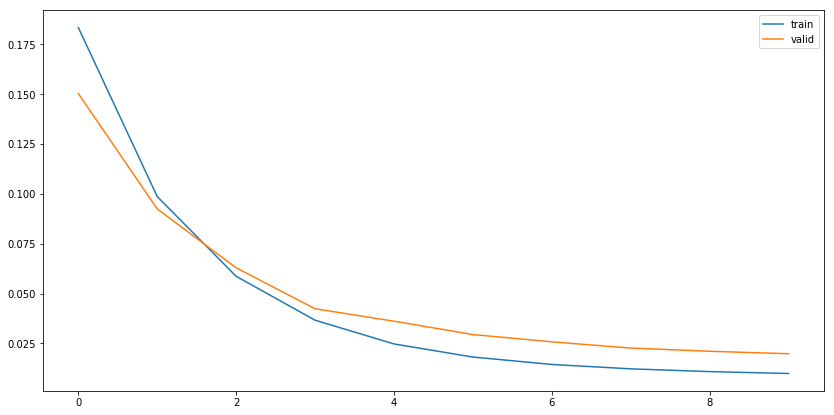

In [40]:
keras_lossplot(model)

In [41]:
model.evaluate(test_x_rnn, test_y_rnn)

284/284 [==============================] - 0s 43us/step


[0.025449206659071882, 0.1231361877330592]

### Bi-RNN Prediction (Inference)

In [42]:
test_x_rnn[:1]

array([[[0.8298889 , 0.65433335, 0.2101    ],
        [0.8277778 , 0.6791667 , 0.19303334],
        [0.8387778 , 0.6594167 , 0.14441666],
        [0.8143333 , 0.683625  , 0.18081667],
        [0.7651111 , 0.6902083 , 0.29873332]]], dtype=float32)

In [43]:
model.predict(test_x_rnn[:1])

array([[[0.68859744, 0.6230364 ],
        [0.9102444 , 0.34396416]]], dtype=float32)

In [44]:
test_y_rnn[:1]

array([[[0.83588886, 0.6701667 ],
        [0.869     , 0.6617917 ]]], dtype=float32)

/opt/conda/envs/tf-py36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


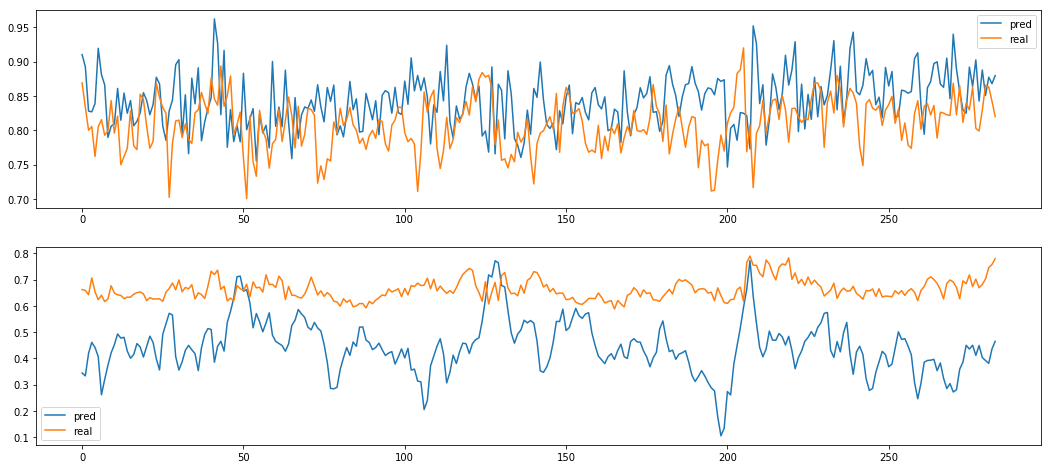

In [45]:
keras_predict_plot(model, test_x_rnn, test_y_rnn, method='rnn')

# References

https://wiseodd.github.io/techblog/2016/06/22/nn-optimization/  
https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21